In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#読み込むデータのパスの設定
current_dir_path = os.getcwd()
data_path = os.path.join(current_dir_path,'ML')
input_list = glob.glob(data_path+'/*'+'/inputdata.csv')
output_list = glob.glob(data_path+'/*'+'/outputdata.csv')
num_data = len(input_list)

In [3]:
#input,outputの読み込み
df_input = {}
df_output = {}
for i in range(int(num_data)):
    input_fname = input_list[i]
    output_fname = output_list[i]
    df_input[i] = pd.read_csv(input_fname, index_col="case_name")
    df_output[i] = pd.read_csv(output_fname, index_col="case_name")

df_input = pd.concat([df_input[i] for i in range(int(num_data))])
df_output = pd.concat([df_output[i] for i in range(int(num_data))])

In [4]:
df_input

,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,...,3_z,3_angle,4_x,4_y,4_z,4_angle,5_x,5_y,5_z,5_angle
case_name,,,,,,,,,,,,,,,,,,,,,
office15_360_164_bout,360,164,b,3.166,3.990,1.255,0.0,3.166,2.540,1.255,...,1.255,0.0,1.266,3.240,1.255,0.0,1.266,1.790,1.255,0.0
office15_660_246_aout,660,246,a,3.166,3.990,1.255,0.0,3.166,2.540,1.255,...,1.255,0.0,1.266,3.240,1.255,0.0,1.266,1.790,1.255,0.0
office15_660_82_bout,660,82,b,3.166,3.990,1.255,0.0,3.166,2.540,1.255,...,1.255,0.0,1.266,3.240,1.255,0.0,1.266,1.790,1.255,0.0
office15_660_82_aout,660,82,a,3.166,3.990,1.255,0.0,3.166,2.540,1.255,...,1.255,0.0,1.266,3.240,1.255,0.0,1.266,1.790,1.255,0.0
office15_660_164_bout,660,164,b,3.166,3.990,1.255,0.0,3.166,2.540,1.255,...,1.255,0.0,1.266,3.240,1.255,0.0,1.266,1.790,1.255,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office22_960_82_bout,960,82,b,3.570,4.235,1.255,270.0,5.020,4.235,1.255,...,1.255,90.0,4.180,2.315,1.255,90.0,5.630,2.315,1.255,90.0
office22_660_0,660,0,off,3.570,4.235,1.255,270.0,5.020,4.235,1.255,...,1.255,90.0,4.180,2.315,1.255,90.0,5.630,2.315,1.255,90.0
office22_360_246_aout,360,246,a,3.570,4.235,1.255,270.0,5.020,4.235,1.255,...,1.255,90.0,4.180,2.315,1.255,90.0,5.630,2.315,1.255,90.0


In [5]:
#排気口位置a,b,offをダミー変数化
dummies = pd.get_dummies(df_input['exhaust'])
df_input.drop("exhaust", axis=1, inplace=True)
df_input = pd.concat([df_input, dummies], axis=1)
df_input = df_input.reindex(columns=['aircon','ventilation','a','b','off'
          ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
          ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle'])

In [5]:
#outputについてnum_zeroとRoIの積を取ってみる(num_nozeroはdiffusivityに全ボックス数をかけたもの)
# df_output_product = df_output.copy()#値をコピーもとには反映しないようにcopy
# product = np.zeros((int(df_output.shape[0]),1), dtype=np.float64)
# for i in range(int(df_output.shape[0])):
#     product[i,0] = df_output.iloc[i,0] * df_output.iloc[i,1]

# df_output_product['RoI'] = product
# df_output_product.drop("num_nozero", axis=1, inplace=True)
# df_output_product.rename(columns={'RoI': 'product_of_numzero_and_RoI'}, inplace=True)

In [6]:
#outputについてdiffusivityとRoIの積を取ってみる
df_output_product = df_output.copy()#値をコピーもとには反映しないようにcopy
product = np.zeros((int(df_output.shape[0]),1), dtype=np.float64)
for i in range(int(df_output.shape[0])):
    """
    ここのdiffusivityとRoIの積のとり方に全てかかっている
    積の値が小さすぎるとうまく学習が行えないので10の0,1乗のオーダーくらいがいい
    単に2値の積を取っただけだと、値の差がうまく出なかった
    そこで二条平均を取ってみると学習もうまくできるよな出力が得られた
    """
    #product[i,0] = df_output.iloc[i,0] * df_output.iloc[i,1]#このままだと0.1*0.1のオーダーで値が小さくなるので100かけたりしてもいいかも
    #product[i,0] = df_output.iloc[i,0] * df_output.iloc[i,1] * 100#100かけてみた
    product[i,0] = np.sqrt((df_output.iloc[i,0]) **2 + (df_output.iloc[i,1]) **2) * 100#二条平均を取ってみた

df_output_product['RoI'] = product
df_output_product.drop("diffusivity", axis=1, inplace=True)
df_output_product.rename(columns={'RoI': 'product_of_diffusivity_and_RoI'}, inplace=True)

/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


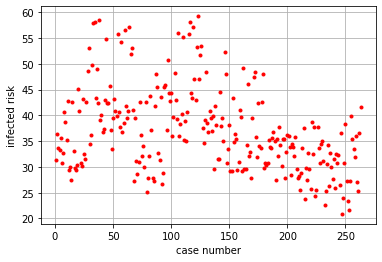

In [7]:
#df_output_productの値の幅を見てみる
x = range(1, df_output_product.shape[0] + 1)
plt.plot(x, df_output_product.iloc[:,0], ".r")
plt.xlabel("case number")
plt.ylabel("infected risk")
#plt.xticks(x, df_output_product.index)
plt.grid()
plt.show()

In [8]:
from sklearn import preprocessing

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
#df_output_productの値が感染確率っぽくないので正規化してみる(これは違うかも)
#num_nozeroをdiffusivityに変更したのでここは使わなくて良い
# mmscaler = preprocessing.MinMaxScaler()
# mmscaler.fit(df_output_product)
# product_mms = mmscaler.transform(df_output_product)
# df_output_product_mms = df_output_product.copy()
# df_output_product_mms['product_of_numzero_and_RoI'] = product_mms

In [9]:
#入力データの標準化
stdscaler = preprocessing.StandardScaler()
stdscaler.fit(df_input)
input_std = stdscaler.transform(df_input)
df_input_std = df_input.copy()
for i in range(int(input_std.shape[1])):
    df_input_std.iloc[:, i] = input_std[:, i]

In [72]:
#機械学習の実装
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
np.random.seed(123)
tf.random.set_seed(123)

In [206]:
#ランダムなデータの分割
train_data, test_data, train_target, test_target \
= train_test_split(df_input_std, df_output_product, test_size=0.2)

In [29]:
#特定のofficeだけテストデータにする
target_office_name = ["office22"]
#正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
office_list = df_input_std.index.str.extract("(office+[0-9]{1,2})").to_numpy()
#リスト内包表記
test_data_index = [i for i in range(office_list.shape[0]) if any(office_list[i] == target_office_name)]
#test_data_index以外をtrain_data_indexとする
train_data_bool = np.ones(office_list.shape[0], dtype = bool)
train_data_bool[test_data_index] = False
train_data_index = np.arange(office_list.shape[0])[train_data_bool]

In [30]:
train_data = df_input_std.iloc[train_data_index]
test_data = df_input_std.iloc[test_data_index]
train_target = df_output_product.iloc[train_data_index]
test_target = df_output_product.iloc[test_data_index]

In [31]:
#トレーニングデータをシャッフルしておかないとk分割交差検証の精度がおかしくなる
train_data = train_data.sample(frac = 1, random_state = 0)
train_target = train_target.sample(frac = 1, random_state = 0)

In [32]:
test_data

,aircon,ventilation,a,b,off,1_x,1_y,1_z,1_angle,2_x,...,3_z,3_angle,4_x,4_y,4_z,4_angle,5_x,5_y,5_z,5_angle
case_name,,,,,,,,,,,,,,,,,,,,,
office22_360_164_bout,-0.389955,0.294952,-0.874700,1.143249,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_660_246_aout,0.435795,1.276880,1.143249,-0.874700,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_660_82_bout,0.435795,-0.686976,-0.874700,1.143249,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_660_82_aout,0.435795,-0.686976,1.143249,-0.874700,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_660_164_bout,0.435795,0.294952,-0.874700,1.143249,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_0_164_aout,-1.380856,0.294952,1.143249,-0.874700,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_0_82_aout,-1.380856,-0.686976,1.143249,-0.874700,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_660_164_aout,0.435795,0.294952,1.143249,-0.874700,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274
office22_660_246_bout,0.435795,1.276880,-0.874700,1.143249,-0.391802,-0.00774,1.436811,1.0,1.877915,0.870156,...,1.0,-0.676106,0.613503,-0.134961,1.0,-0.124274,2.054556,0.2473,1.0,-0.124274


In [107]:
def build_model(train_data, optimizer):
    model = keras.Sequential()
    model.add(Dense(64, kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
#     model.add(Dense(64, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.001)))
#     model.add(BatchNormalization())
#     model.add(Activation("relu"))
    model.add(Dense(1, kernel_initializer="he_normal"))
    model.build(input_shape=(train_data.shape))
    model.summary()
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [12]:
model.weights#重みの表示

NameError: name 'model' is not defined

In [71]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model = build_model(optimizer)
model.fit(train_data, train_target, epochs=100, batch_size=16, verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (76, 64)                  1664      
                                                                 
 dense_22 (Dense)            (76, 64)                  4160      
                                                                 
 dense_23 (Dense)            (76, 1)                   65        
                                                                 
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0636 - mae: 0.1824
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0688
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0444
Epoch 4/100
5/5 [=======================

In [72]:
val_mse, val_mae = model.evaluate(test_data, test_target, verbose=0)
print('test_mse: {:.4f}, test_mae: {:.4f}'.format(val_mse, val_mae))

test_mse: 0.0039, test_mae: 0.0347


In [13]:
#k分割交差検証
k = 4
num_val_samples = len(train_data) // k#商の整数値
num_epochs = 100
all_scores = []
optimizer = optimizers.RMSprop(learning_rate=0.001)#勾配降下法等の値の更新を行う関数を指定
for i in range(k):
    print(f"Processing fold #{i}")
    #検証データの前処理
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]#k分割したi番目のデータ群
    val_target = train_target[i * num_val_samples : (i+1) * num_val_samples]
    #訓練データの前処理
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i+1) * num_val_samples :]], axis=0)
    partial_train_target = np.concatenate(
        [train_target[: i * num_val_samples],
         train_target[(i+1) * num_val_samples :]], axis=0)
    
    #kerasによるNNモデル生成
    model = build_model(optimizer)
    model.fit(partial_train_data, partial_train_target, 
              epochs=num_epochs, batch_size=16, verbose=0)
    #モデルの評価
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)
    
print(all_scores)

Processing fold #0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (76, 64)                  1664      
                                                                 
 dense_1 (Dense)             (76, 64)                  4160      
                                                                 
 dense_2 (Dense)             (76, 1)                   65        
                                                                 
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


2022-06-08 16:46:02.357306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-08 16:46:02.357344: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-08 16:46:02.357371: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (enehenmaster-System-Product-Name): /proc/driver/nvidia/version does not exist
2022-06-08 16:46:02.357698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Processing fold #1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (76, 64)                  1664      
                                                                 
 dense_4 (Dense)             (76, 64)                  4160      
                                                                 
 dense_5 (Dense)             (76, 1)                   65        
                                                                 
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________
Processing fold #2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (76, 64)                  1664      
                                                          

In [108]:
#k分割交差検証
#全てのフォールド(k分割したもののひとつ)についてmaeの平均を各エポックについて求める
k = 4
num_val_samples = len(train_data) // k#商の整数値
num_epochs = 3000
all_mae_histories = []
optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.99)#勾配降下法等の値の更新を行う関数を指定
for i in range(k):
    print(f"Processing fold #{i}")
    #検証データの前処理
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]#k分割したi番目のデータ群
    val_target = train_target[i * num_val_samples : (i+1) * num_val_samples]
    #訓練データの前処理
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i+1) * num_val_samples :]], axis=0)
    partial_train_target = np.concatenate(
        [train_target[: i * num_val_samples],
         train_target[(i+1) * num_val_samples :]], axis=0)
    
    #kerasによるNNモデル生成
    model = build_model(partial_train_data, optimizer)
    history = model.fit(partial_train_data, partial_train_target, 
              validation_data=(val_data, val_target), 
              epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_209 (Dense)           (177, 64)                 1664      
                                                                 
 batch_normalization_143 (Ba  (177, 64)                256       
 tchNormalization)                                               
                                                                 
 activation_112 (Activation)  (177, 64)                0         
                                                                 
 dropout_102 (Dropout)       (177, 64)                 0         
                                                                 
 dense_210 (Dense)           (177, 64)                 4160      
                                                                 
 batch_normalization_144 (Ba  (177, 64)                256       
 tchNormalization)                

 activation_122 (Activation)  (177, 64)                0         
                                                                 
 dropout_112 (Dropout)       (177, 64)                 0         
                                                                 
 dense_223 (Dense)           (177, 64)                 4160      
                                                                 
 batch_normalization_154 (Ba  (177, 64)                256       
 tchNormalization)                                               
                                                                 
 activation_123 (Activation)  (177, 64)                0         
                                                                 
 dropout_113 (Dropout)       (177, 64)                 0         
                                                                 
 dense_224 (Dense)           (177, 1)                  65        
                                                                 
Total para

In [109]:
"""
mae_historyには学習を行った500エポック分の検証データのmaeが格納されている
それをk分割した領域全てに対して求めており、それらをひとつのリストにまとめたのがall_mae_histories
all_mae_historiesの形状は[4,500]となっている
これについてまずk分割した領域の1エポック目のmaeについてk個の平均を取ったものを500エポック分まとめたものがaverage_mae_history
"""
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

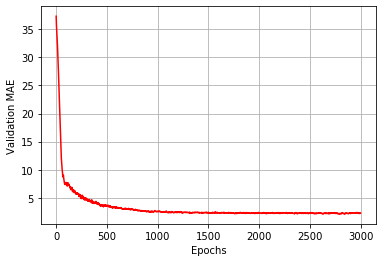

In [110]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, "-r")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.grid()
plt.show()

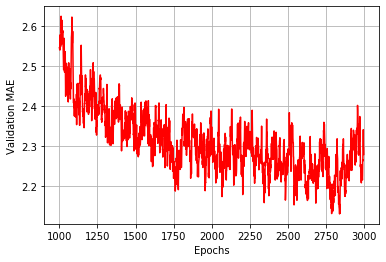

In [112]:
#初めの数エポックの値が大きいのでそこを除いてみる
trim_position = 1000
trim_mae_history = average_mae_history[trim_position:]
plt.plot(range(trim_position, len(trim_mae_history) + trim_position), trim_mae_history, "-r")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
# plt.xlim(0,520)
plt.grid()
plt.show()

In [141]:
#全データを使って訓練してみる
optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.99)
model = build_model(train_data, optimizer)
# model.fit(train_data, train_target, epochs=500, batch_size=16, verbose=1)
es = EarlyStopping(monitor="val_mae", patience=100, verbose=0)#定めたパラメータの最小値更新が行われなければ打ち切り
hist = model.fit(train_data, train_target, epochs=3000, batch_size=16, verbose=1, validation_data=(test_data, test_target), callbacks=[es])
val_mse, val_mae = model.evaluate(test_data, test_target, verbose=0)
print('test_mse: {:.4f}, test_mae: {:.4f}'.format(val_mse, val_mae))

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_253 (Dense)           (235, 64)                 1664      
                                                                 
 batch_normalization_176 (Ba  (235, 64)                256       
 tchNormalization)                                               
                                                                 
 activation_145 (Activation)  (235, 64)                0         
                                                                 
 dropout_135 (Dropout)       (235, 64)                 0         
                                                                 
 dense_254 (Dense)           (235, 64)                 4160      
                                                                 
 batch_normalization_177 (Ba  (235, 64)                256       
 tchNormalization)                                   

15/15 [==============================] - 0s 6ms/step - loss: 104.4466 - mae: 8.5141 - val_loss: 86.4865 - val_mae: 7.9515
Epoch 44/3000
15/15 [==============================] - 0s 7ms/step - loss: 111.7957 - mae: 8.5449 - val_loss: 95.3639 - val_mae: 8.4214
Epoch 45/3000
15/15 [==============================] - 0s 7ms/step - loss: 101.2853 - mae: 7.8492 - val_loss: 80.5884 - val_mae: 7.5858
Epoch 46/3000
15/15 [==============================] - 0s 7ms/step - loss: 100.9232 - mae: 7.8598 - val_loss: 62.7902 - val_mae: 6.5525
Epoch 47/3000
15/15 [==============================] - 0s 6ms/step - loss: 103.7875 - mae: 8.1407 - val_loss: 55.0619 - val_mae: 6.1250
Epoch 48/3000
15/15 [==============================] - 0s 7ms/step - loss: 89.8505 - mae: 7.5265 - val_loss: 43.6768 - val_mae: 5.4644
Epoch 49/3000
15/15 [==============================] - 0s 6ms/step - loss: 94.9742 - mae: 7.6640 - val_loss: 40.5711 - val_mae: 5.2440
Epoch 50/3000
15/15 [==============================] - 0s 7ms/st

15/15 [==============================] - 0s 7ms/step - loss: 85.6350 - mae: 7.2859 - val_loss: 29.0533 - val_mae: 4.3537
Epoch 104/3000
15/15 [==============================] - 0s 6ms/step - loss: 88.3443 - mae: 7.3457 - val_loss: 27.1732 - val_mae: 4.1916
Epoch 105/3000
15/15 [==============================] - 0s 6ms/step - loss: 81.4668 - mae: 6.9851 - val_loss: 29.6338 - val_mae: 4.4007
Epoch 106/3000
15/15 [==============================] - 0s 6ms/step - loss: 81.0993 - mae: 6.9351 - val_loss: 25.6481 - val_mae: 4.0615
Epoch 107/3000
15/15 [==============================] - 0s 6ms/step - loss: 76.7504 - mae: 6.8784 - val_loss: 24.2146 - val_mae: 3.9438
Epoch 108/3000
15/15 [==============================] - 0s 7ms/step - loss: 80.0395 - mae: 7.1435 - val_loss: 23.3152 - val_mae: 3.8634
Epoch 109/3000
15/15 [==============================] - 0s 6ms/step - loss: 83.0109 - mae: 7.3030 - val_loss: 23.8345 - val_mae: 3.9031
Epoch 110/3000
15/15 [==============================] - 0s 5ms/

15/15 [==============================] - 0s 6ms/step - loss: 69.5276 - mae: 6.6702 - val_loss: 15.7006 - val_mae: 3.2203
Epoch 164/3000
15/15 [==============================] - 0s 7ms/step - loss: 78.0646 - mae: 6.9447 - val_loss: 16.2292 - val_mae: 3.2762
Epoch 165/3000
15/15 [==============================] - 0s 7ms/step - loss: 72.8747 - mae: 7.0183 - val_loss: 17.0147 - val_mae: 3.3357
Epoch 166/3000
15/15 [==============================] - 0s 7ms/step - loss: 71.9739 - mae: 6.6126 - val_loss: 16.5119 - val_mae: 3.2765
Epoch 167/3000
15/15 [==============================] - 0s 7ms/step - loss: 64.9108 - mae: 6.3419 - val_loss: 16.4583 - val_mae: 3.2500
Epoch 168/3000
15/15 [==============================] - 0s 6ms/step - loss: 76.0059 - mae: 7.1246 - val_loss: 16.3959 - val_mae: 3.2784
Epoch 169/3000
15/15 [==============================] - 0s 5ms/step - loss: 68.8801 - mae: 6.5348 - val_loss: 15.2400 - val_mae: 3.2468
Epoch 170/3000
15/15 [==============================] - 0s 6ms/

15/15 [==============================] - 0s 7ms/step - loss: 62.7923 - mae: 6.5822 - val_loss: 14.1625 - val_mae: 2.9456
Epoch 224/3000
15/15 [==============================] - 0s 6ms/step - loss: 69.9832 - mae: 6.6710 - val_loss: 14.3267 - val_mae: 2.9547
Epoch 225/3000
15/15 [==============================] - 0s 6ms/step - loss: 64.6335 - mae: 6.2352 - val_loss: 14.0986 - val_mae: 2.9405
Epoch 226/3000
15/15 [==============================] - 0s 7ms/step - loss: 60.9058 - mae: 6.0992 - val_loss: 14.2833 - val_mae: 3.0235
Epoch 227/3000
15/15 [==============================] - 0s 6ms/step - loss: 65.3770 - mae: 6.3644 - val_loss: 14.0336 - val_mae: 3.0192
Epoch 228/3000
15/15 [==============================] - 0s 6ms/step - loss: 61.8828 - mae: 6.4089 - val_loss: 14.4186 - val_mae: 3.0952
Epoch 229/3000
15/15 [==============================] - 0s 6ms/step - loss: 62.5861 - mae: 6.4428 - val_loss: 14.0088 - val_mae: 3.0217
Epoch 230/3000
15/15 [==============================] - 0s 6ms/

15/15 [==============================] - 0s 7ms/step - loss: 55.3786 - mae: 5.9057 - val_loss: 15.4063 - val_mae: 3.2190
Epoch 284/3000
15/15 [==============================] - 0s 7ms/step - loss: 61.2349 - mae: 6.1734 - val_loss: 14.5609 - val_mae: 3.0988
Epoch 285/3000
15/15 [==============================] - 0s 7ms/step - loss: 58.4672 - mae: 6.0385 - val_loss: 16.0252 - val_mae: 3.2913
Epoch 286/3000
15/15 [==============================] - 0s 7ms/step - loss: 59.2643 - mae: 6.1869 - val_loss: 14.4529 - val_mae: 3.1119
Epoch 287/3000
15/15 [==============================] - 0s 7ms/step - loss: 66.0568 - mae: 6.4583 - val_loss: 14.2891 - val_mae: 3.0878
Epoch 288/3000
15/15 [==============================] - 0s 6ms/step - loss: 55.9057 - mae: 5.9767 - val_loss: 14.3005 - val_mae: 3.0934
Epoch 289/3000
15/15 [==============================] - 0s 7ms/step - loss: 52.6093 - mae: 5.5880 - val_loss: 14.5579 - val_mae: 3.1287
Epoch 290/3000
15/15 [==============================] - 0s 6ms/

15/15 [==============================] - 0s 6ms/step - loss: 73.0498 - mae: 6.5360 - val_loss: 13.7116 - val_mae: 3.0181
Epoch 344/3000
15/15 [==============================] - 0s 7ms/step - loss: 64.1647 - mae: 6.5911 - val_loss: 13.6819 - val_mae: 3.0186
Epoch 345/3000
15/15 [==============================] - 0s 6ms/step - loss: 55.5438 - mae: 5.8229 - val_loss: 13.8865 - val_mae: 3.0443
Epoch 346/3000
15/15 [==============================] - 0s 6ms/step - loss: 55.6559 - mae: 5.7710 - val_loss: 13.3329 - val_mae: 2.9801
Epoch 347/3000
15/15 [==============================] - 0s 6ms/step - loss: 57.8226 - mae: 5.8920 - val_loss: 13.6036 - val_mae: 3.0121
Epoch 348/3000
15/15 [==============================] - 0s 6ms/step - loss: 56.2999 - mae: 6.0182 - val_loss: 16.0397 - val_mae: 3.3675
Epoch 349/3000
15/15 [==============================] - 0s 7ms/step - loss: 48.3901 - mae: 5.5075 - val_loss: 15.7736 - val_mae: 3.3358
Epoch 350/3000
15/15 [==============================] - 0s 6ms/

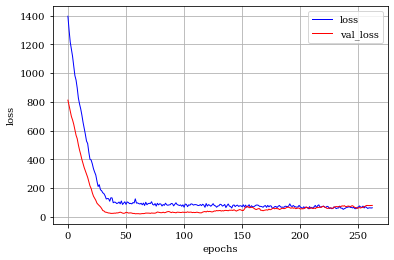

In [137]:
#誤差関数の推移を見てみる
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

fig = plt.figure()
plt.rc("font", family="serif")
plt.plot(range(len(loss)), loss, color="blue", linewidth=1, label="loss")
plt.plot(range(len(val_loss)), val_loss, color="red", linewidth=1, label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid()
plt.show()

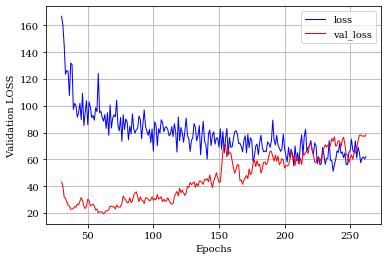

In [138]:
#初めの数エポックの値が大きいのでそこを除いてみる
trim_position = 30
trim_loss_history = loss[trim_position:]
trim_val_loss_history = val_loss[trim_position:]
plt.plot(range(trim_position, len(trim_loss_history) + trim_position), trim_loss_history, "-b", linewidth=1, label="loss")
plt.plot(range(trim_position, len(trim_val_loss_history) + trim_position), trim_val_loss_history, "-r", linewidth=1, label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Validation LOSS")
plt.legend(loc="best")
plt.grid()
plt.show()

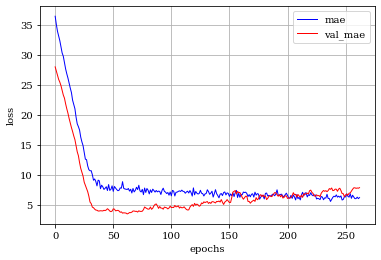

In [139]:
#maeの推移を見てみる
mae = hist.history["mae"]
val_mae = hist.history["val_mae"]

fig = plt.figure()
plt.rc("font", family="serif")
plt.plot(range(len(mae)), mae, color="blue", linewidth=1, label="mae")
plt.plot(range(len(val_mae)), val_mae, color="red", linewidth=1, label="val_mae")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid()
plt.show()

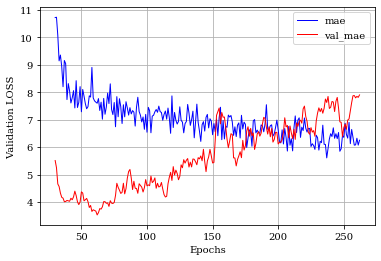

In [140]:
#初めの数エポックの値が大きいのでそこを除いてみる
trim_position = 30
trim_mae_history = mae[trim_position:]
trim_val_mae_history = val_mae[trim_position:]
plt.plot(range(trim_position, len(trim_mae_history) + trim_position), trim_mae_history, "-b", linewidth=1, label="mae")
plt.plot(range(trim_position, len(trim_val_mae_history) + trim_position), trim_val_mae_history, "-r", linewidth=1, label="val_mae")
plt.xlabel("Epochs")
plt.ylabel("Validation LOSS")
plt.legend(loc="best")
plt.grid()
plt.show()

In [15]:
#df_input.head(50)
#df_output.head(50)
df_output_product.head(50)
#df_output_product_mms.head(50)
#df_input_std.head(50)
#train_target

,product_of_diffusivity_and_RoI
case_name,
office15_360_164_bout,31.419488
office15_660_246_aout,36.416799
office15_660_82_bout,33.609651
office15_660_82_aout,33.234858
office15_660_164_bout,35.551218
office15_0_164_aout,30.748541
office15_0_82_aout,32.675118
office15_660_164_aout,40.561698
office15_660_246_bout,38.643672
